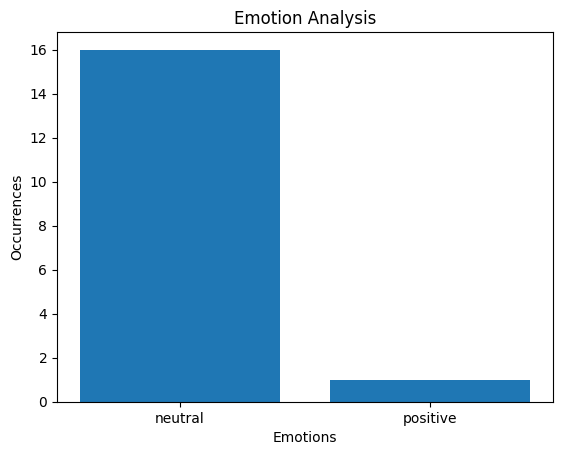

Error sending alert email: [Errno 11001] getaddrinfo failed


In [3]:
import tkinter as tk
from tkinter import messagebox
from textblob import TextBlob
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import smtplib

# Emotions and Corresponding Background Colors
emotion_colors = {
    "positive": "lightgreen",
    "negative": "lightcoral",
    "neutral": "lightgray",
    "joy": "yellow",
    "sadness": "lightskyblue",
    "anger": "red",
    "fear": "darkorange",
    "surprise": "lime",
    "disgust": "purple",
    "love": "pink"
}

# Define sensitive keywords
sensitive_keywords = ["suicide", "help", "sad", "depressed", "cry", "died"]

# Email configuration
sender_email = "kdaf007@gmail.com"  # Replace with your email
sender_password = "yhkt manl xmrz ecpk"      # Replace with your email password
recipient_email = "mdashrafali1623@gmail.com"

# Emotion Analysis Function
def analyze_emotion(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return "positive"
    elif sentiment_score < 0:
        return "negative"
    else:
        return "neutral"

# Sentiment Analysis Function
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return "positive"
    elif sentiment_score < 0:
        return "negative"
    else:
        return "neutral"

# Typing Feedback Function
def typing_feedback(event):
    typed_text = typing_entry.get()
    emotion = analyze_emotion(typed_text)
    sentiment = analyze_sentiment(typed_text)

    if sentiment == "positive":
        typing_label.config(text="You're doing great! 😄")
    elif sentiment == "negative":
        typing_label.config(text="Negative sentiment detected. 😔")
    else:
        typing_label.config(text="Neutral sentiment. 😐")

    check_for_alert(typed_text)

    update_emotion_counter(emotion)
    change_background_color(emotion)

# Mindful Writing Prompts
mindful_prompts = [
    "Write down three things you're grateful for today.",
    "Describe a happy memory that makes you smile.",
    "Write a positive affirmation for yourself.",
    "Take a moment to focus on your breathing.",
    "What's one thing that brings you peace?",
    "Write about a challenge you've overcome and what you've learned from it.",
    "Describe a place that makes you feel calm and relaxed.",
]

def get_mindful_prompt():
    return random.choice(mindful_prompts)

# GUI Setup
app = tk.Tk()
app.title("Mindful Typing")
app.geometry("400x350")

typing_label = tk.Label(app, text="Type your thoughts:")
typing_label.pack()

typing_entry = tk.Entry(app, width=40)
typing_entry.pack()

typing_entry.bind("<KeyRelease>", typing_feedback)

def show_mindful_prompt():
    prompt = get_mindful_prompt()
    messagebox.showinfo("Mindful Prompt", prompt)

mindful_prompt_btn = tk.Button(app, text="Get Mindful Prompt", command=show_mindful_prompt)
mindful_prompt_btn.pack()

# Emotion Graph
emotion_counter = defaultdict(int)

def update_emotion_counter(emotion):
    emotion_counter[emotion] += 1

def show_emotion_graph():
    plt.bar(emotion_counter.keys(), emotion_counter.values())
    plt.xlabel('Emotions')
    plt.ylabel('Occurrences')
    plt.title('Emotion Analysis')
    plt.show()

emotion_graph_btn = tk.Button(app, text="Show Emotion Graph", command=show_emotion_graph)
emotion_graph_btn.pack()

# Function to Change Background Color
def change_background_color(emotion):
    app.configure(bg=emotion_colors.get(emotion, "white"))

# Function to send an alert email
def send_alert_email():
    try:
        server = smtplib.SMTP("smtp.gmail.com", 587)
        server.starttls()
        server.login(sender_email, sender_password)
        
        subject = "Alert: User May Need Help"
        message = "The user has typed a concerning message or is expressing sadness."
        email_text = f"Subject: {subject}\n\n{message}"
        
        server.sendmail(sender_email, recipient_email, email_text)
        server.quit()
        print("Alert email sent successfully.")
    except Exception as e:
        print(f"Error sending alert email: {str(e)}")

# Function to check for sensitive keywords and trigger an alert
def check_for_alert(text):
    for keyword in sensitive_keywords:
        if keyword in text.lower():
            send_alert_email()
            break

# Inspirational Quote Generator
inspirational_quotes = [
    "The only way to do great work is to love what you do. - Steve Jobs",
    "The best time to plant a tree was 20 years ago. The second best time is now. - Chinese Proverb",
    "The future belongs to those who believe in the beauty of their dreams. - Eleanor Roosevelt",
    "Believe you can and you're halfway there. - Theodore Roosevelt",
    "In the middle of difficulty lies opportunity. - Albert Einstein",
    "The only limit to our realization of tomorrow will be our doubts of today. - Franklin D. Roosevelt"
]

def get_inspirational_quote():
    return random.choice(inspirational_quotes)

def show_inspirational_quote():
    quote = get_inspirational_quote()
    popup = tk.Toplevel(app)
    popup.title("Inspirational Quote")
    popup.geometry("300x100")

    quote_label = tk.Label(popup, text=quote, wraplength=250)
    quote_label.pack(pady=10)

    ok_btn = tk.Button(popup, text="OK", command=popup.destroy)
    ok_btn.pack()

    app.update()
    window_width = app.winfo_width()
    window_height = app.winfo_height()
    x = app.winfo_x() + (window_width - popup.winfo_reqwidth()) // 2
    y = app.winfo_y() + (window_height - popup.winfo_reqheight()) // 2
    popup.geometry("+{}+{}".format(x, y))

quote_btn = tk.Button(app, text="Get Inspirational Quote", command=show_inspirational_quote)
quote_btn.pack()

app.mainloop()